# Module imports and version check

Import the key modules needed later on and check their versions to make sure this analysis can be reproduced.

In [1]:
import matplotlib.pyplot
assert matplotlib.__version__>='1.5.1'

import numpy
assert numpy.__version__>='1.10.4'

/home/alek/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Setup the `matplotlib` environment to make the plots look pretty.

In [2]:
# Show the plots inside the notebook.
%matplotlib inline
# Make the figures high-resolution.
%config InlineBackend.figure_format='retina'
# Various font sizes.
ticksFontSize=18
labelsFontSizeSmall=20
labelsFontSize=30
titleFontSize=34
legendFontSize=14
matplotlib.rc('xtick', labelsize=ticksFontSize) 
matplotlib.rc('ytick', labelsize=ticksFontSize)
# Colourmaps.
cm=matplotlib.pyplot.cm.get_cmap('viridis')

# Introduction

This is notebook analyses the data from a projection of an evolutionary space debris model [DAMAGE](http://www.southampton.ac.uk/~hglewis/spacedebris/DAMAGE.html "DAMAGE description"). It investigates the amplification of the numbers of fragments that collisions generate themselves, which occurs due to follow-on collisions. The projected scenario is "mitigation only" with additional collision avoidance performed by active spacecraft.

# Read the data

Read the data about the number of fragments generated in DAMAGE collisions as well as the corresponding number of fragments in the final (2213) population snapshot, which every collision gave rise to. This accounts for the follow-on collisions that occurred in certain cases, as well as decay of fragments. Store the data in arrays and distinguish between all collisions and the subset of catastrophic collisions, which exceeded the $40\ J/g$ energy threshold.

The data are stored on GitHub. Will read one file at a time and cap the amount of characters to be read at any given time, not to clog the network.

In [3]:
import urllib2, numpy
from __future__ import print_function

# All collisions.
lines=urllib2.urlopen('https://raw.githubusercontent.com/AleksanderLidtke/\
AnalyseCollisionFragments/master/AllColGenerated').read(856393*25) # no. lines * no. chars per line
allColGen=numpy.array(lines.split('\n')[1:-1],dtype=numpy.float64) # Skip the header and the last empty line

lines=urllib2.urlopen('https://raw.githubusercontent.com/AleksanderLidtke/\
AnalyseCollisionFragments/master/AllColResulting').read(856393*25)
allColRes=numpy.array(lines.split('\n')[1:-1],dtype=numpy.float64)

assert allColGen.shape==allColRes.shape
print("Read data for {} collisions.".format(allColGen.size))

# Catastrophic collisions (a subset of all collisions).
lines=urllib2.urlopen('https://raw.githubusercontent.com/AleksanderLidtke/\
AnalyseCollisionFragments/master/CatColGenerated').read(500227*25) # Fewer lines for the subset of all collisions.
catColGen=numpy.array(lines.split('\n')[1:-1],dtype=numpy.float64)

lines=urllib2.urlopen('https://raw.githubusercontent.com/AleksanderLidtke/\
AnalyseCollisionFragments/master/CatColResulting').read(500227*25)
catColRes=numpy.array(lines.split('\n')[1:-1],dtype=numpy.float64)

assert catColGen.shape==catColRes.shape
print("Read data for {} catastrophic collisions.".format(catColGen.size))

Read data for 856392 collisions.
Read data for 500226 catastrophic collisions.


# Analyse the ratio

## Description

Investigate the fact that sometimes follow-on collisions will result in certain collisions being responsible for more fragments at some census epoch than they generated themselves. In order to do this, investigate the ratio between the number of fragments in the population snapshot in 2213 that resulted from a given collision, $N_{res}$, and the number of fragments $\geq 10$ cm generated in every collision, $N_{gen}$:
$$ r=\frac{N_{res}}{N_{gen}}. $$
$N_{res}$ is the *effective number of objects* $\geq 10$ cm passing through the low-Earth orbit (LEO) volume that every collision has given rise to. If a fragment from collision $C_1$ took part in another collision, $C_2$, all the fragments from these two collisions left on-orbit at the census epoch are said to have been caused by $C_1.$ This is because if $C_1$ hadn't taken place, $C_2$ wouldn't have taken place either.

The effective number of objects $N_{res}$ is computed as the number of fragments $\geq 10$ cm, $N$, multiplied by the fraction of the orbital period that the fragments spend under the altitude of 2000 km, i.e. within the LEO regime:
$$N_{res}=N\times\frac{\tau_{LEO}}{\tau},$$
where $\tau_{LEO}$ is the time that the object fragments spend under the altitude of 2000 km during every orbit, and $\tau$ is the orbital period.

## Results

This is what the ratio $r$ looks like for all collisions and the subset of catastrophic ones.

/home/alek/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


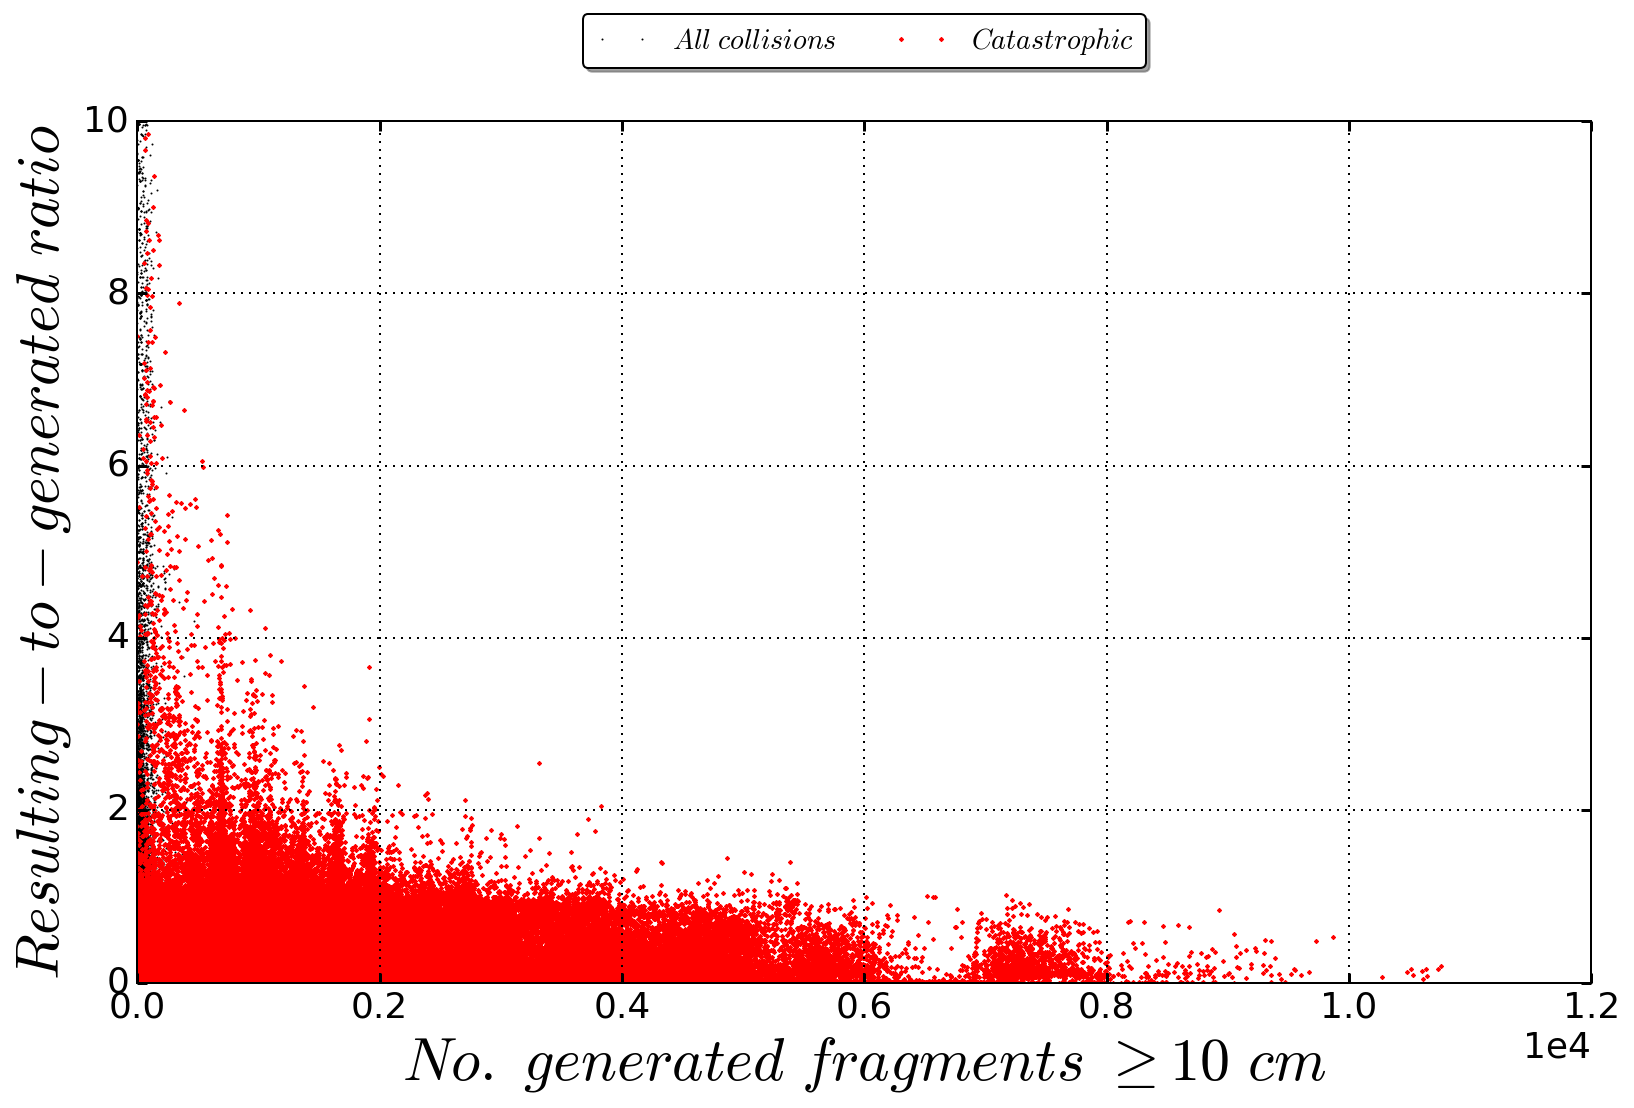

In [4]:
# Compute the ratios.
allRatios=allColRes/allColGen
catRatios=catColRes/catColGen
# Plot.
fig=matplotlib.pyplot.figure(figsize=(12,8))
ax=fig.gca()
matplotlib.pyplot.grid(linewidth=1)
ax.set_xlabel(r"$Time\ (s)$",fontsize=labelsFontSize)
ax.set_ylabel(r"$Response\ (-)$",fontsize=labelsFontSize)
ax.set_xlim(0,7)
ax.set_ylim(-2,2)
ax.plot(allColGen,allRatios,alpha=1.0,label=r"$All\ collisions$",marker='o',c='k',markersize=1,mew=0,lw=0)
ax.plot(catColGen,catRatios,alpha=1.0,label=r"$Catastrophic$",marker='x',c='r',markersize=1,mew=2,lw=0)
ax.set_xlabel(r"$No.\ generated\ fragments\ \geq10\ cm$",fontsize=labelsFontSize)
ax.set_ylabel(r"$Resulting-to-generated\ ratio$",fontsize=labelsFontSize)
ax.set_xlim(0,12000)
ax.set_ylim(0,10)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,-1))
ax.tick_params(axis='both',reset=False,which='both',length=5,width=1.5)
matplotlib.pyplot.subplots_adjust(left=0.1,right=0.95,top=0.95,bottom=0.1)
box=ax.get_position()
ax.set_position([box.x0+box.width*0.0,box.y0+box.height*0.05,box.width*0.99,box.height*0.88])
ax.legend(bbox_to_anchor=(0.5,1.14),loc='upper center',prop={'size':legendFontSize},fancybox=True,\
          shadow=True,ncol=3)
fig.show()

Not very legible, right? But some things can be observed in the above figure anyway. First of all, there's a "dip" in the number of generated fragments around $6.5\times 10^4$. This was caused by the fact that the number of generated fragments, $N$, exceeding a certain length $L_c$ is given by a power law:
$$ N(L_c)=0.1M^{0.75}L_c^{-1.71},$$
whre $M$ is the mass of both objects [[1](http://www.sciencedirect.com/science/article/pii/S0273117701004239)]. This shows that, in spite of 150000 Monte Carlo (MC) runs being used to project the analysed scenario over 200 years, there simply weren't many collisions that involved two objects with masses that resulted in around $6.5\times10^4$ fragments. This is because the distribution of the masses of objects in orbit isn't continuous and not every combination of collided masses is equally likely.

Now, let us bin the ratios inside fixed-width bins and compute the mean and median inside each bin to see if the mean is close to the median, i.e. whether the distribution is close to normal-ish:

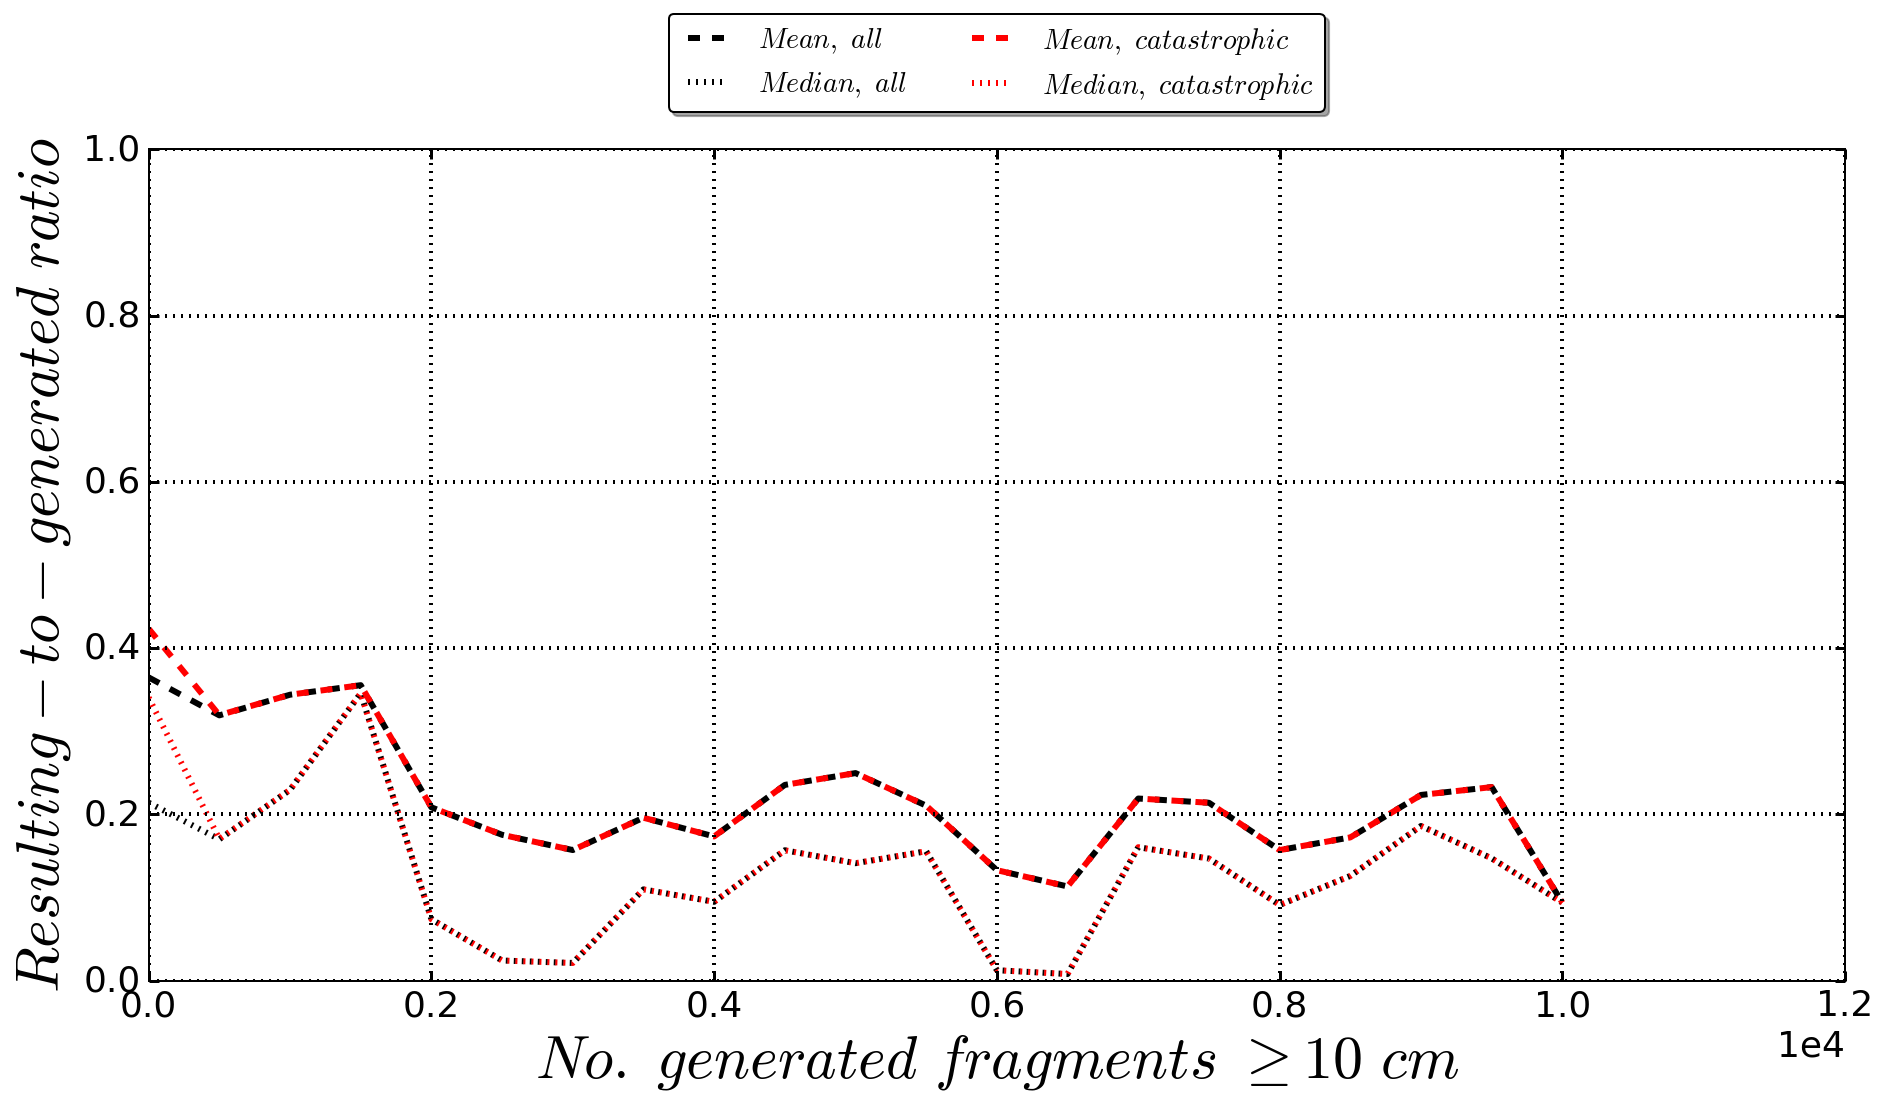

In [5]:
bins=numpy.arange(0,allColGen.max(),500)
means=numpy.zeros(bins.size-1)
medians=numpy.zeros(bins.size-1)
meansCat=numpy.zeros(bins.size-1)
mediansCat=numpy.zeros(bins.size-1)
for i in range(bins.size-1):
    means[i]=numpy.mean(allRatios[(allColGen>=bins[i]) & (allColGen<bins[i+1])])
    medians[i]=numpy.median(allRatios[(allColGen>=bins[i]) & (allColGen<bins[i+1])])
    meansCat[i]=numpy.mean(catRatios[(catColGen>=bins[i]) & (catColGen<bins[i+1])])
    mediansCat[i]=numpy.median(catRatios[(catColGen>=bins[i]) & (catColGen<bins[i+1])])

# Plot.
fig=matplotlib.pyplot.figure(figsize=(14,8))
ax=fig.gca()
matplotlib.pyplot.grid(linewidth=2)
ax.plot(bins[:-1],means,alpha=1.0,label=r"$Mean,\ all$",marker=None,c='k',lw=3,ls='--')
ax.plot(bins[:-1],medians,alpha=1.0,label=r"$Median,\ all$",marker=None,c='k',lw=3,ls=':')
ax.plot(bins[:-1],meansCat,alpha=1.0,label=r"$Mean,\ catastrophic$",marker=None,c='r',lw=3,ls='--')
ax.plot(bins[:-1],mediansCat,alpha=1.0,label=r"$Median,\ catastrophic$",marker=None,c='r',lw=3,ls=':')
ax.set_xlabel(r"$No.\ generated\ fragments\ \geq10\ cm$",fontsize=labelsFontSize)
ax.set_ylabel(r"$Resulting-to-generated\ ratio$",fontsize=labelsFontSize)
ax.set_xlim(0,12000)
ax.set_ylim(0,1)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,-1))
ax.tick_params(axis='both',reset=False,which='both',length=5,width=1.5)
matplotlib.pyplot.subplots_adjust(left=0.1,right=0.95,top=0.92,bottom=0.1)
box=ax.get_position()
ax.set_position([box.x0+box.width*0.0,box.y0+box.height*0.05,box.width*0.99,box.height*0.88])
ax.legend(bbox_to_anchor=(0.5,1.18),loc='upper center',prop={'size':legendFontSize},fancybox=True,\
          shadow=True,ncol=2)
fig.show()

The more fragments were generated in a collision, the fewer fragments a given collision gave rise to in the final population. This seems counter-intuitive because large collisions are expected to contribute more to the long-term growth of the debris population than others, which generate fewer fragments [[2](http://www.iadc-online.org/Documents/IADC-2012-08,%20Rev%201,%20Stability%20of%20Future%20LEO%20Environment.pdf)]. However, these plots do not contradict this thesis about the reasons for the growth of the number of debris because they do not show which collisions will drive the predicted growth of the number of objects in orbit. Rather, they show which collisions are likely to results in many follow-on collisions that will amplify the number of fragments that the collisions generate, thus fuelling the "Kessler syndrome"[[3](http://webpages.charter.net/dkessler/files/Collision%20Frequency.pdf)]. They do not necessarily say that th number of resulting fragments will be large on absolute terms.

The mean in every analysed bin was considerably different than the median, meaning that the distributions in every bin were far from normal. This means that in every bin relatively few collisions resulted in many follow-on collisions that increased the ratio $r$. This is what the distribution of the ratio $r$ looks like in every bin of the no. generated fragments:

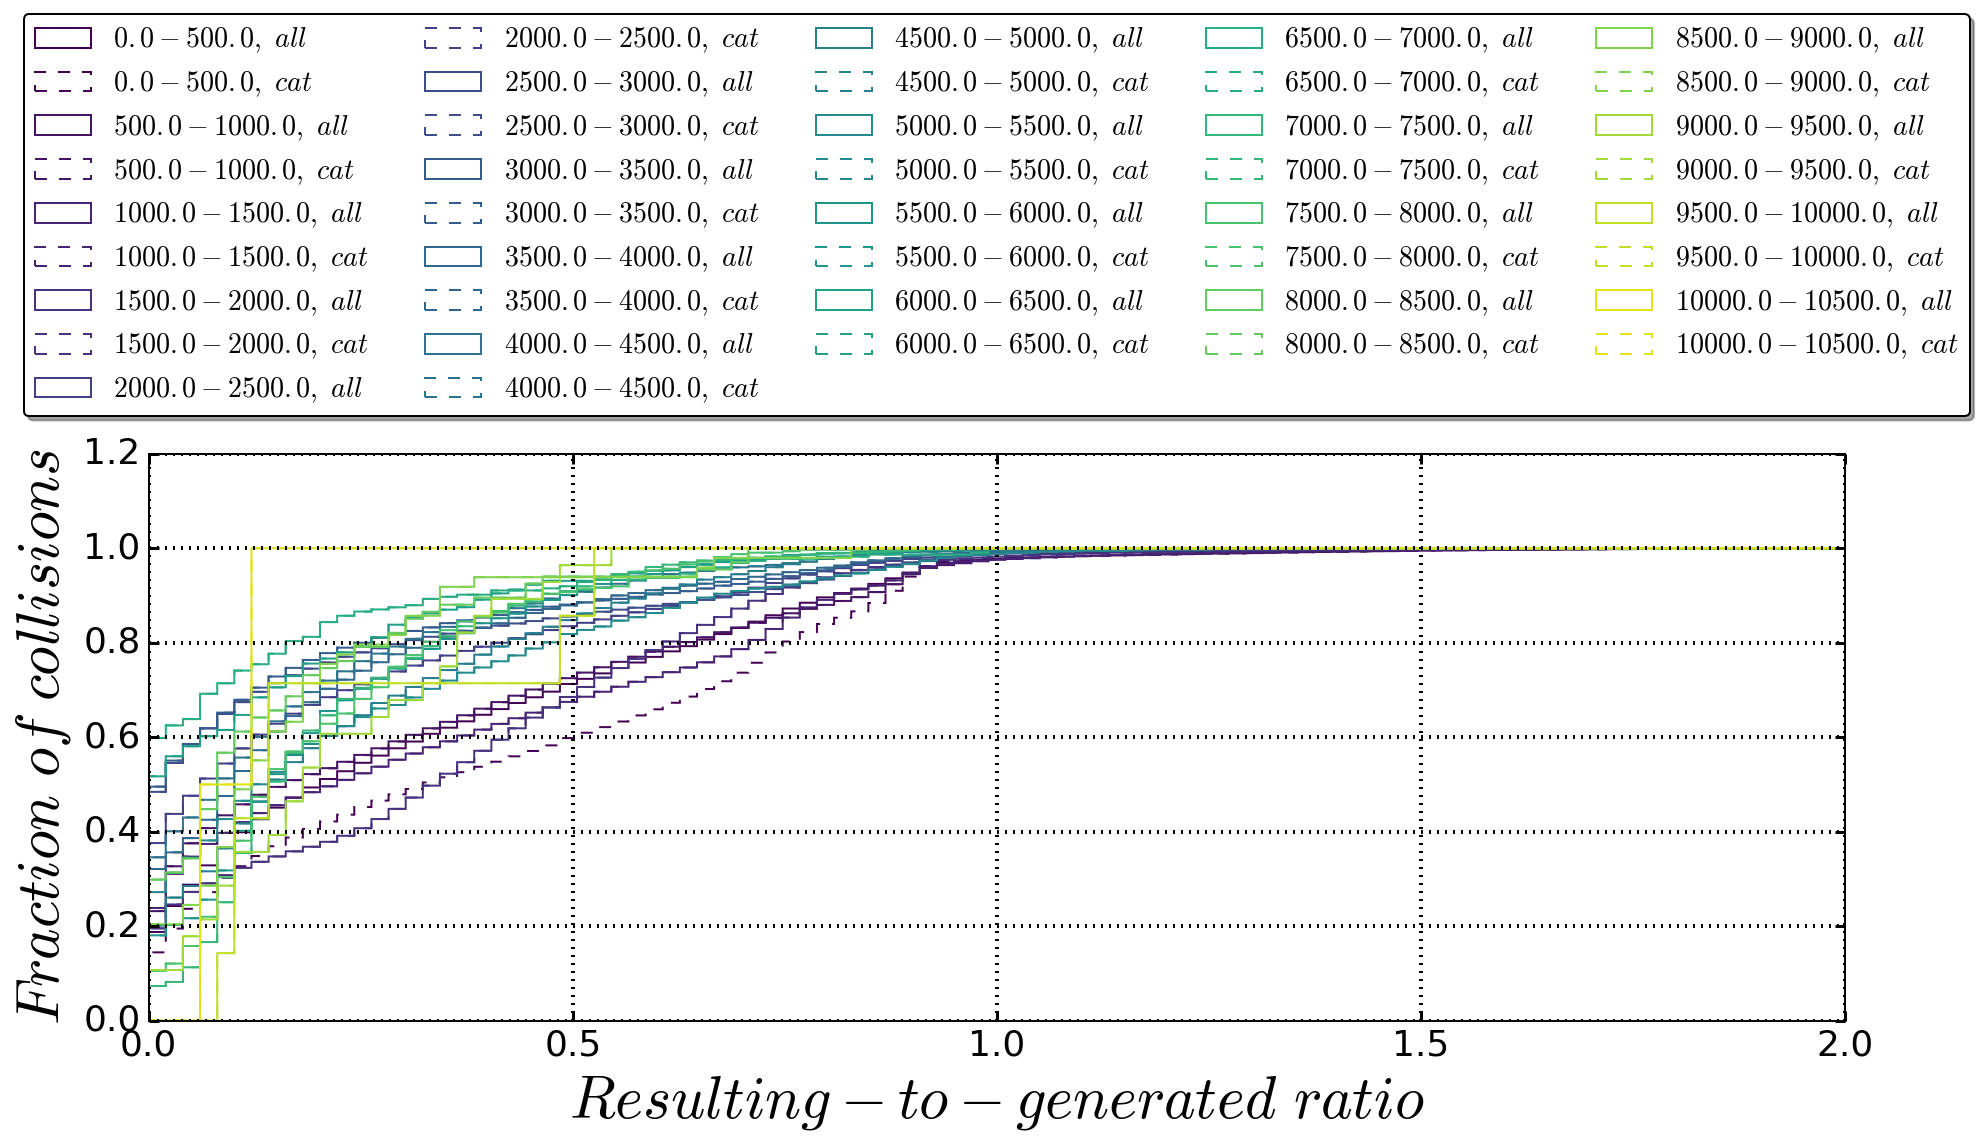

In [10]:
ratioBins=numpy.linspace(0,2,100)
# Get colours for every bin of the number of generated fragments.
cNorm=matplotlib.colors.Normalize(vmin=0, vmax=bins.size-1)
scalarMap=matplotlib.cm.ScalarMappable(norm=cNorm,cmap=cm)
histColours=[]
for i in range(0,bins.size-1):
    histColours.append(scalarMap.to_rgba(i))
# Plot the histograms.
fig=matplotlib.pyplot.figure(figsize=(14,8))
ax=fig.gca()
matplotlib.pyplot.grid(linewidth=2)
ax.set_xlabel(r"$Resulting-to-generated\ ratio$",fontsize=labelsFontSize)
ax.set_ylabel(r"$Fraction\ of\ collisions$",fontsize=labelsFontSize)
for i in range(bins.size-1):
    ax.hist(allRatios[(allColGen>=bins[i]) & (allColGen<bins[i+1])],\
            ratioBins,normed=1,cumulative=1,histtype='step',ls='solid',\
            color=histColours[i],label=r"${}-{},\ all$".format(bins[i],bins[i+1]))
    ax.hist(catRatios[(catColGen>=bins[i]) & (catColGen<bins[i+1])],\
            ratioBins,normed=1,cumulative=1,histtype='step',ls='dashed',\
            color=histColours[i],label=r"${}-{},\ cat$".format(bins[i],bins[i+1]))
ax.set_xlim(0,2)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,-1))
ax.tick_params(axis='both',reset=False,which='both',length=5,width=1.5)
matplotlib.pyplot.subplots_adjust(left=0.1,right=0.95,top=0.92,bottom=0.1)
box=ax.get_position()
ax.set_position([box.x0+box.width*0.0,box.y0+box.height*0.05,box.width*0.99,box.height*0.6])
ax.legend(bbox_to_anchor=(0.5,1.8),loc='upper center',prop={'size':legendFontSize},fancybox=True,\
          shadow=True,ncol=5)
fig.show()

Most collisions had a ratio of less than $2.0$. Only

In [7]:
numpy.sum(allRatios>=2.0)/float(allRatios.size)*100

0.46392306327009125

percent of collisions generated twice as many or more fragments in the final population than they generated themselves.